<br><font face="Times New Roman" size=5><div dir=ltr align=center>
<font color=blue size=8>
    Introduction to Machine Learning <br>
<font color=red size=5>
    Sharif University of Technology - Computer Engineering Department <br>
    Fall 2022<br> <br>
<font color=black size=6>
    Homework 2: Practical - SVM
    <br>
<font color=black size=4>
    Alireza Gargoori Motlagh, Alireza Heidari
    
<br><br>
<font size=4>
   **Name**: Zahra Soukhtedel<br>
   **Student ID**: 98105138 <br> <br>
In this homework, we are going to implement the algorithms from the second and third chapters of the course, so reading the notebooks of these chapters would be quite useful. Also, we are going to evaulate and compare our models by the metrics defined in chapter 3. Keep in mind to complete all of the following questions and write your own codes in the TODO parts.

## <font face="Times New Roman" size=4><div dir=ltr>
## Problem 3: Face Classification by SVM on Eigenfaces (150 points)
In the following problem, we are going to build a classifier to distinguish the faces of 40 people on a toy dataset. The dataset includes 400 pictures of 40 people faces, each by a 64*64 pixel picture. Use the following cell to download the dataset:

In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

faces = datasets.fetch_olivetti_faces()
print(faces.data.shape)
print(faces.images[0].shape)

(400, 4096)
(64, 64)


<font face="Times New Roman" size=4><div dir=ltr>
### Visualization of the Faces (5 points)
Plot an image of each class in one figure using subplots. (Note that the design matrix X is availabe in <code>faces.data</code> and the target values available in <code>faces.target</code> .)

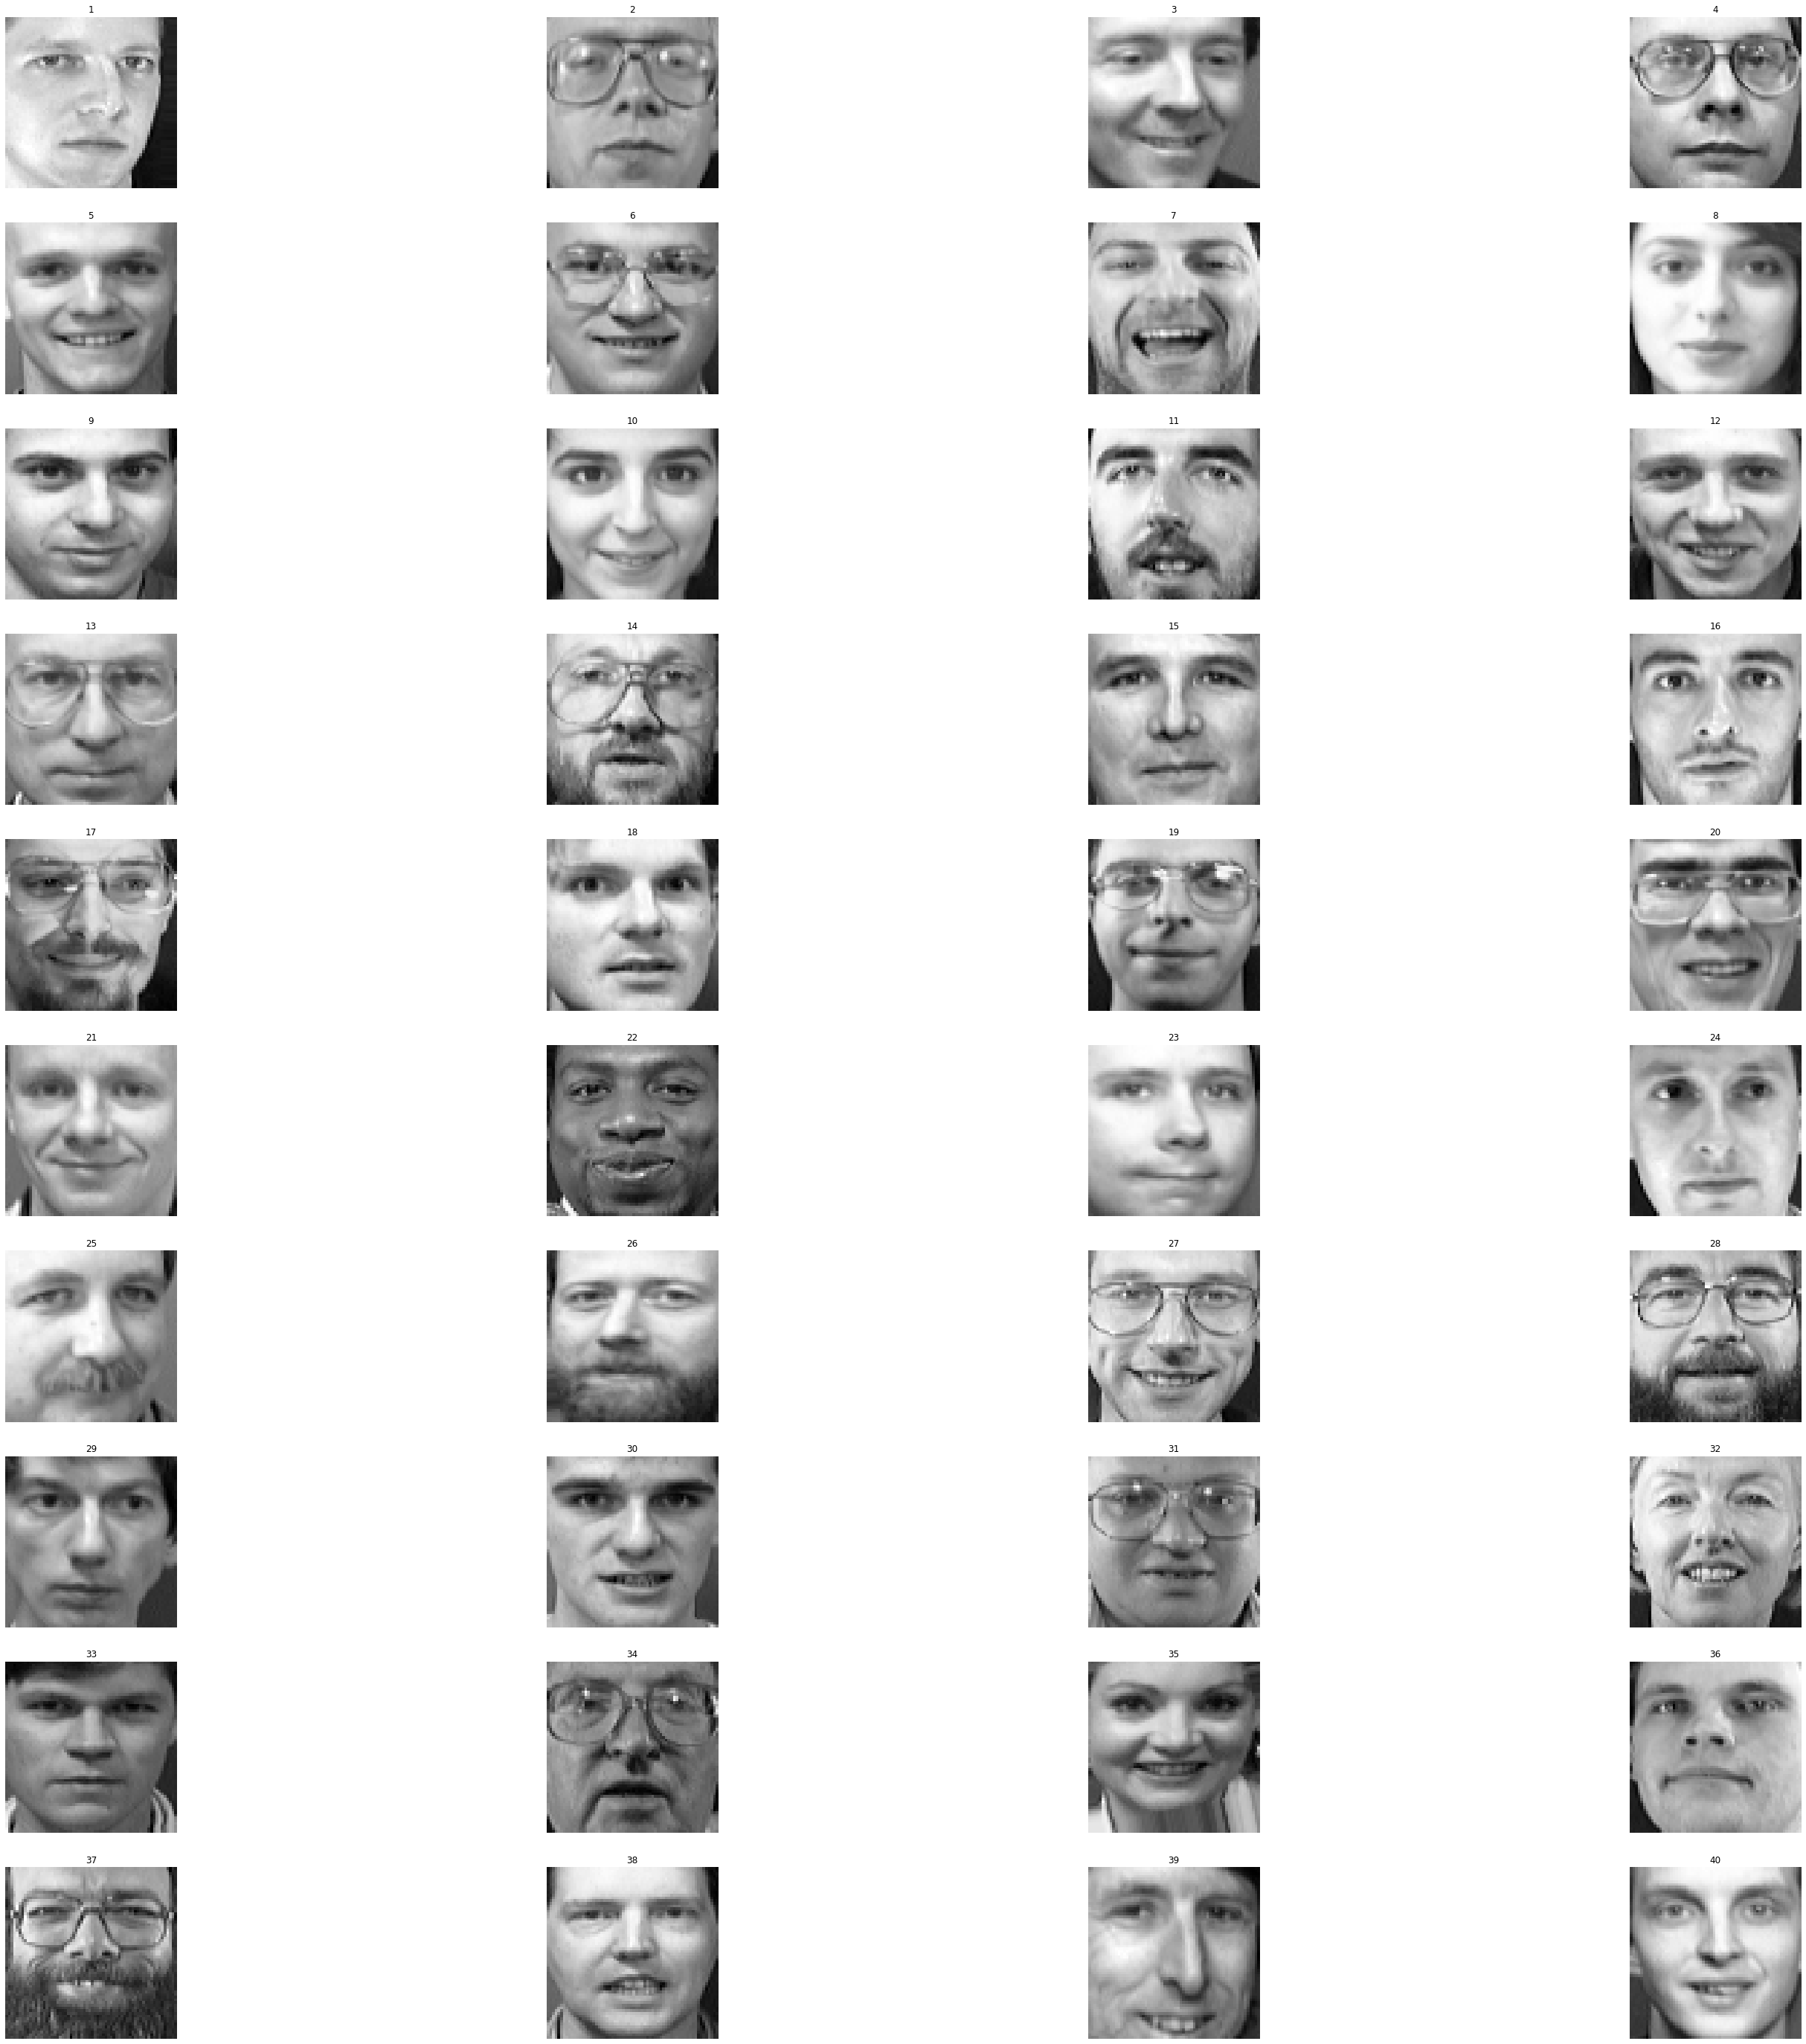

In [2]:
fig = plt.figure(figsize=(50, 50))

for i in range(40):
    fig.add_subplot(10, 4, i + 1)
    face = faces.data[i*10 + 1, :].reshape((64, 64))
    plt.imshow(face, cmap='gray')
    plt.axis('off')
    plt.title(i+1)



<font face="Times New Roman" size=4><div dir=ltr>
### Train-Test Split (2 points)
Split the data into train and test sets and print the dimensions of each set. (70% for train and 30% for test)

In [3]:
from sklearn.model_selection import train_test_split
X = faces.data
Y = faces.target

x_train, x_test, y_train, y_test = train_test_split(X, Y, stratify=Y, test_size=0.3, random_state=42)

print("train dimention : ", len(x_train), ", test dimention : ", len(x_test))

train dimention :  280 , test dimention :  120


<font face="Times New Roman" size=4><div dir=ltr>
### Dimensionality Reduction (18 points)
As you might have guessed, the number of featuers, i.e. pixels, is quite large and training a classifier might take a considerbale time. However, using a wise method to reduce the dimension of our data could decrease the cost of training the model. In the following cell use PCA (Principal Component Analysis) to reduce the dimension of the dataset. Choose an appropirate number of components in your PCA and explain your reason for your choice.

first rescale data between 0, 1. 

the amount of data that captured is important.

by applying pca = PCA(n_components = 0.98) we will preserve 98% of the variability in the data.

also we can figure out the number of components that is approperiate by analysing cumulative scree plot.

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(x_train)

then apply pca:

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.98)
pca.fit(x_train)
reduced = pca.transform(data_rescaled)

<font face="Times New Roman" size=4><div dir=ltr>
Plot the scree plot of the proportion of the variance explained(PVE) vs principal components to determine the number of principal components for futher analysis.

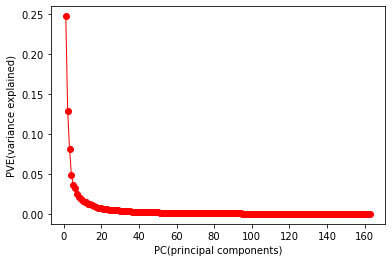

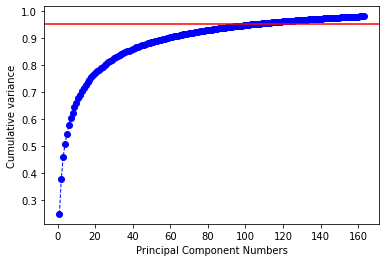

In [13]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=1, color='red')
plt.xlabel('PC(principal components)')
plt.ylabel('PVE(variance explained)')
plt.show()

plt.plot(PC_values, np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', color='b', linewidth = 1)
plt.axhline(y=0.95, color='r', linestyle='-')
plt.xlabel('Principal Component Numbers')
plt.ylabel('Cumulative variance')
plt.show()

<font face="Times New Roman" size=4><div dir=ltr>
### Eigenfaces: Principal Components Visualization (25 points)
Plot the mean face using your PCA model with <code>pca.mean_</code> attribute followed by a reshape to original dimensions. What is this mean vector?

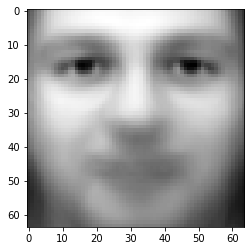

In [14]:
mean = pca.mean_
plt.imshow(mean.reshape((64, 64)), cmap='gray')

<font face="Times New Roman" size=4><div dir=ltr>
Eigenfaces is the name given to a set of eigenvectors when used in the computer vision problem of human face recognition. Plot the 30 first eigenfaces sorted by their rank from the most important to the lowest. Can you explain what these faces indicate?

163


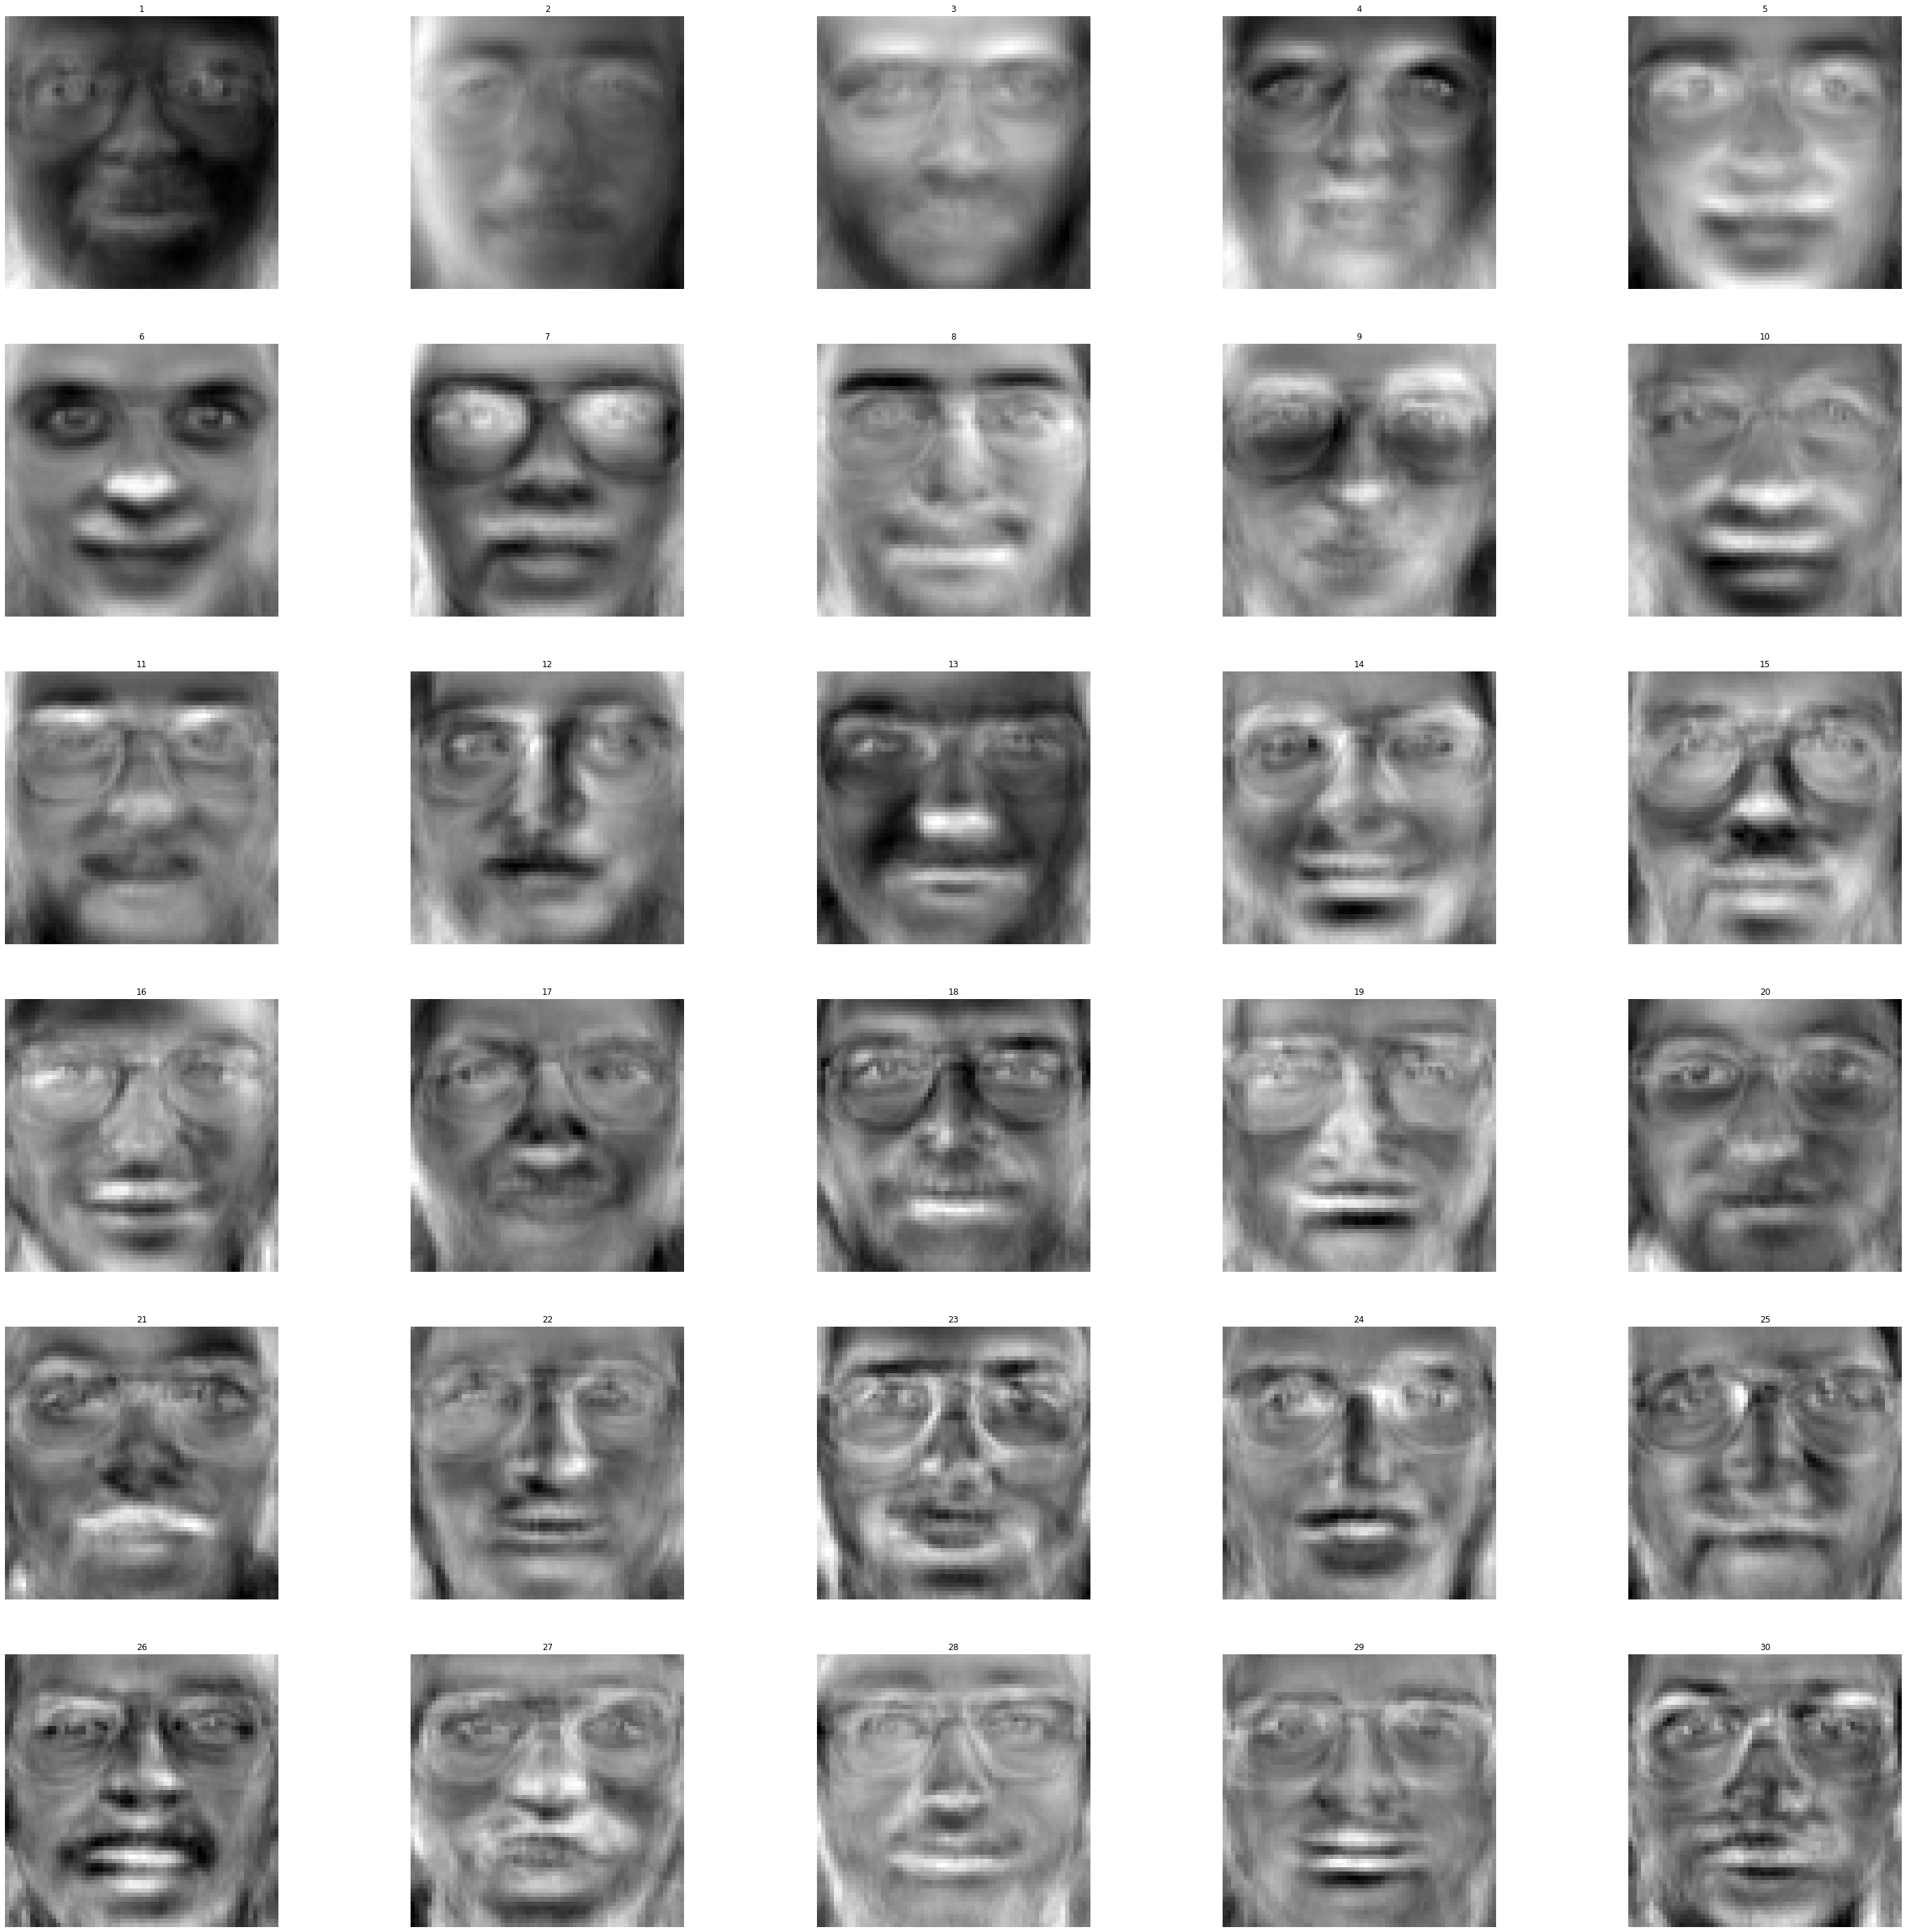

In [15]:
eigenfaces = pca.components_[:30]
print(len(pca.components_))
fig = plt.figure(figsize=(50, 50))
for i in range(30):
    fig.add_subplot(6, 5, i + 1)
    face = eigenfaces[i].reshape((64, 64))
    plt.imshow(face, cmap='gray')
    plt.axis('off')
    plt.title(i+1)


these eigenfaces contain some facial characteristics to build pictures. in witch they're sorted by their level of importance.

<font face="Times New Roman" size=4><div dir=ltr>
Transform your train and test sets to the new feature space using your PCA module. 

In [16]:
x_train_new = pca.transform(x_train)
x_test_new = pca.transform(x_test)

<font face="Times New Roman" size=4><div dir=ltr>
### Training your SVM Classifier (50 points)
Train an SVM classifier on the transformed dataset in the new feature space. You should use Grid Search Cross Validation or other validation techniques to obtain the best hyperparameters for your classifier. 

In [18]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

parameters = {'kernel': ('linear', 'rbf', 'poly'), 'C' : [1, 2, 3, 4 , 5, 6,7 , 8, 9, 10], 'degree' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'gamma':[1, 0.1, 0.01, 0.001, 0.0001]}
grid = GridSearchCV(svm.SVC(), param_grid = parameters)
grid.fit(x_train_new, y_train)
grid.best_params_


{'C': 3, 'degree': 1, 'gamma': 0.01, 'kernel': 'poly'}

In [19]:
clf = svm.SVC(kernel='poly', C=3,  degree=1, gamma=0.01)
clf.fit(x_train_new, y_train)

SVC(C=3, degree=1, gamma=0.01, kernel='poly')

<font face="Times New Roman" size=4><div dir=ltr>
After training your model, we can check its prediction on test samples. Run the following cell to check your model predictions with the target values on test samples. Predictions with red label indicate false classification of your model.

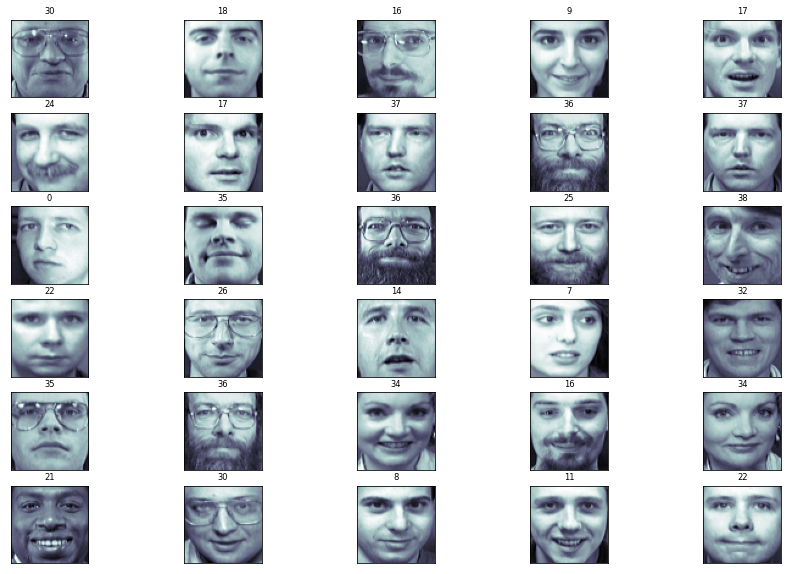

In [20]:
fig = plt.figure(figsize=(15, 10))
for i in range(30):
    ax = fig.add_subplot(6, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(x_test[i].reshape(faces.images[0].shape),
              cmap=plt.cm.bone)
    y_pred = clf.predict(x_test_new[i, np.newaxis])[0] #X_test_new is the transformed X_test after PCA.
    color = ('black' if y_pred == y_test[i] else 'red')
    ax.set_title(y_pred, fontsize='small', color=color)

<font face="Times New Roman" size=4><div dir=ltr>
## Performance Measures
Let's evaluate your classifier to find out how good your model is.
    
    
### Precision Recall Tradeoff (20 points)
Plot the precision and recall versus the decision threshold figure and precision vs recall figure.

from sk learn doc we have:

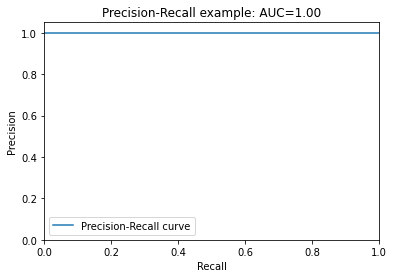

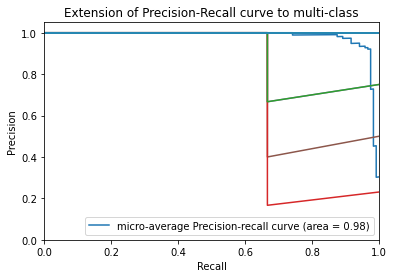

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm, datasets
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier


# Binarize the output
binary_y_test = label_binarize(y_test, classes=[x for x in range(0, 40)])
binary_y_train = label_binarize(y_train, classes=[x for x in range(0, 40)])
n_classes = binary_y_train.shape[1]


# Run classifier
classifier = OneVsRestClassifier(clf)
y_score = classifier.fit(x_train_new, binary_y_train).decision_function(x_test_new)


# Compute Precision-Recall and plot curve
precision = dict()
recall = dict()
thresh = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], thresh[i] = precision_recall_curve(binary_y_test[:, i],
                                                        y_score[:, i])
    average_precision[i] = average_precision_score(binary_y_test[:, i], y_score[:, i])

    
    
# Compute micro-average ROC curve and ROC area
precision["micro"], recall["micro"], thresh["micro"]= precision_recall_curve(binary_y_test.ravel(), y_score.ravel())
average_precision["micro"] = average_precision_score(binary_y_test, y_score, average="micro")

#Plot Precision-Recall curve
plt.clf()
plt.plot(recall[0], precision[0], label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall example: AUC={0:0.2f}'.format(average_precision[0]))
plt.legend(loc="lower left")
plt.show()

# Plot Precision-Recall curve for each class
plt.clf()
plt.plot(recall["micro"], precision["micro"],
         label='micro-average Precision-recall curve (area = {0:0.2f})'
               ''.format(average_precision["micro"]))

for i in range(n_classes):
    plt.plot(recall[i], precision[i])

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Extension of Precision-Recall curve to multi-class')
plt.legend(loc="lower right")
plt.show()

# for i in range(n_classes):
#     plt.plot(recall[i], thresh[i])
# plt.xlim([1.0, 1.0])
# plt.ylim([1.05, 1.05])
# plt.xlabel('Recall')
# plt.ylabel('threshold')
# plt.title('Extension of Precision-Recall curve to multi-class')
# plt.legend(loc="lower right")
# plt.show()

# for i in range(n_classes):
#     plt.plot(precision[i], thresh[i])
# plt.xlim([1.0, 1.05])
# plt.ylim([1.05, 1.0])
# plt.xlabel('precision')
# plt.ylabel('threshold')
# plt.title('Extension of Precision-Recall curve to multi-class')
# plt.legend(loc="lower right")
# plt.show()


<font face="Times New Roman" size=4><div dir=ltr>
Then find the decision threshold, where the recall is equal to the precision. Write down it in the below cell:
    <br>
note: it should be apparent in the above figures.

based on the curve we have:

decision_threshold = 0.9

recall at the above threshold = 0.9

<font face="Times New Roman" size=4><div dir=ltr>
### ROC/AUC (10 points)
Train a RandomForestClassifier with 30 estimators then plot a ROC curve, and calculate AUC for both randomForsetClassifier and your SVM classifier that you trained earlier, which one is the best by considering AUC indicator?


In [24]:
from sklearn.ensemble import RandomForestClassifier
#TODO: Train the random forest on the data

RF_classifier = RandomForestClassifier(n_estimators=30)
RF_classifier.fit(x_train_new, y_train)
y_predicions = RF_classifier.predict(x_test_new)

ROC curve of class 0 (area = 1.00)
ROC curve of class 1 (area = 1.00)
ROC curve of class 2 (area = 1.00)
ROC curve of class 3 (area = 1.00)
ROC curve of class 4 (area = 0.99)
ROC curve of class 5 (area = 1.00)
ROC curve of class 6 (area = 1.00)
ROC curve of class 7 (area = 1.00)
ROC curve of class 8 (area = 1.00)
ROC curve of class 9 (area = 1.00)
ROC curve of class 10 (area = 1.00)
ROC curve of class 11 (area = 1.00)
ROC curve of class 12 (area = 0.97)
ROC curve of class 13 (area = 1.00)
ROC curve of class 14 (area = 1.00)
ROC curve of class 15 (area = 1.00)
ROC curve of class 16 (area = 1.00)
ROC curve of class 17 (area = 1.00)
ROC curve of class 18 (area = 1.00)
ROC curve of class 19 (area = 1.00)
ROC curve of class 20 (area = 1.00)
ROC curve of class 21 (area = 1.00)
ROC curve of class 22 (area = 1.00)
ROC curve of class 23 (area = 1.00)
ROC curve of class 24 (area = 1.00)
ROC curve of class 25 (area = 1.00)
ROC curve of class 26 (area = 1.00)
ROC curve of class 27 (area = 1.00)
RO

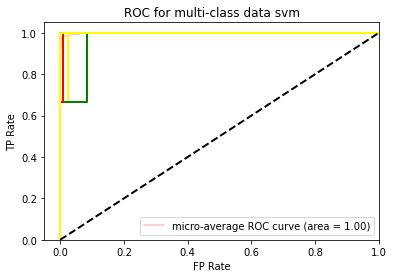

ROC AUC score for  svm is: 0.9989316239316238
ROC curve of class 0 (area = 0.83)
ROC curve of class 1 (area = 0.83)
ROC curve of class 2 (area = 0.82)
ROC curve of class 3 (area = 0.83)
ROC curve of class 4 (area = 0.82)
ROC curve of class 5 (area = 1.00)
ROC curve of class 6 (area = 0.83)
ROC curve of class 7 (area = 1.00)
ROC curve of class 8 (area = 0.98)
ROC curve of class 9 (area = 0.67)
ROC curve of class 10 (area = 1.00)
ROC curve of class 11 (area = 1.00)
ROC curve of class 12 (area = 0.83)
ROC curve of class 13 (area = 1.00)
ROC curve of class 14 (area = 1.00)
ROC curve of class 15 (area = 0.49)
ROC curve of class 16 (area = 0.67)
ROC curve of class 17 (area = 0.99)
ROC curve of class 18 (area = 0.83)
ROC curve of class 19 (area = 1.00)
ROC curve of class 20 (area = 0.83)
ROC curve of class 21 (area = 1.00)
ROC curve of class 22 (area = 0.50)
ROC curve of class 23 (area = 1.00)
ROC curve of class 24 (area = 1.00)
ROC curve of class 25 (area = 0.83)
ROC curve of class 26 (area 

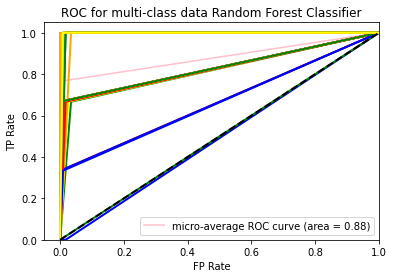

ROC AUC score for  Random Forest Classifier is: 0.8803418803418804


In [26]:
from itertools import cycle
from sklearn.metrics import roc_curve, roc_auc_score ,auc


#TODO: plot roc_curve and print roc_auc_score for svm and random forest classifiers
def plot_multiclass_roc(y_score, name):

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(40):
        fpr[i], tpr[i], _ = roc_curve(binary_y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    fpr["micro"], tpr["micro"], _ = roc_curve(binary_y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    # plt.clf()
    plt.plot(fpr["micro"], tpr["micro"], label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]), color="pink")
    colors = cycle(['blue', 'red', 'green', 'orange','yellow'])
    for i, color in zip(range(40), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2)
        print('ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('FP Rate')
    plt.ylabel('TP Rate')
    plt.title('ROC for multi-class data'+name)
    plt.legend(loc="best")
    plt.show()
    print("ROC AUC score for "+name+" is: "+ str(roc_auc_score(binary_y_test, y_score, average='macro', multi_class='ovo')))

plot_multiclass_roc(y_score,' svm')
plot_multiclass_roc(label_binarize(y_predicions, classes=[i for i in range(40)]),' Random Forest Classifier')


<font face="Times New Roman" size=4><div dir=ltr>
### Classification Report (5 points)
Use the <code>classification_report</code> to describe the performance of your SVM model with different metrics. Explain your results and compare the predictions of model on different classes in few sentences.

In [29]:
from sklearn.metrics import classification_report
y_preds = clf.predict(x_test_new)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       1.00      0.67      0.80         3
           5       0.75      1.00      0.86         3
           6       1.00      1.00      1.00         3
           7       0.75      1.00      0.86         3
           8       1.00      1.00      1.00         3
           9       1.00      0.33      0.50         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         3
          14       0.75      1.00      0.86         3
          15       1.00      1.00      1.00         3
          16       1.00      1.00      1.00         3
          17       1.00    

<font face="Times New Roman" size=4><div dir=ltr>
### Confusion Matrix (15 points)
Plot the confusion matrix of the classifier's predictions.
Let’s focus on the errors of the plot. Divide each value in the confusion matrix by the number of images in the corresponding class so that you can compare error rates instead of absolute number of errors, then plot the result.

In [44]:
# TODO: calculate conf_mx then print it
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_preds)
confusion_matrix

array([[3, 0, 0, ..., 0, 0, 0],
       [0, 3, 0, ..., 0, 0, 0],
       [0, 0, 3, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 3, 0, 0],
       [0, 0, 0, ..., 0, 3, 0],
       [0, 0, 0, ..., 0, 0, 3]], dtype=int64)

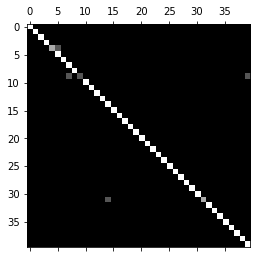

In [45]:
# TODO: after calculating confusion matrix, visualize it using below code

plt.matshow(confusion_matrix, cmap=plt.cm.gray)
plt.show()

In [47]:
# TODO: calculate norm_conf_mx then print it
from sklearn.metrics import confusion_matrix
norm_confusion_matrix = confusion_matrix(y_test, y_preds, normalize='all')
norm_confusion_matrix

array([[0.025, 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.025, 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.025, ..., 0.   , 0.   , 0.   ],
       ...,
       [0.   , 0.   , 0.   , ..., 0.025, 0.   , 0.   ],
       [0.   , 0.   , 0.   , ..., 0.   , 0.025, 0.   ],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.025]])

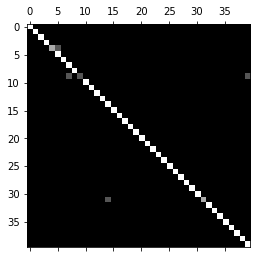

In [48]:
plt.matshow(norm_confusion_matrix, cmap=plt.cm.gray)
plt.show()